<a href="https://colab.research.google.com/github/Akyadavv/Netflix-Movies-and-TV-Shows-Clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset was gathered through the third-party Netflix search engine Flixable. The amount of TV series available on Netflix has almost tripled since 2010, according to an interesting analysis that was published in 2018. Since 2010, the number of films available on the streaming service has dropped by more than 2,000, although the number of TV episodes has nearly tripled. Investigating what further insights may be drawn from the same dataset will be intriguing.

**Approaches**:-


**step 1**: As the first step, viewing and cleaning the data, I mounted the drive, imported the required libraries, and then stored the data in variables to produce actionable insights. We next analysed our data distribution using univariate, bivariate, and multivariate plots as the next step in the data analysis and visualisation process. There was a multicollinearity check.

**Step 2**: Replaced some entries with null, some with the phrase "unknown," and some were omitted because the presence of null values could have caused issues in the following steps.

**Step 3**: As part of the feature engineering process, processed textual data, including contraction expansion, lower case conversion, punctuation and stopword removal, normalisation, and vectorization. We used standardscalar for data scaling.

**stage 4**: As the final stage, clustering was carried out using various methods. I used K-Means, ElbowCurve, DBSCAN, Dendogram, and Agglomerative Clustering.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset was gathered through the third-party Netflix search engine Flixable. The amount of TV series available on Netflix has almost tripled since 2010, according to an interesting analysis that was published in 2018. Since 2010, the number of films available on the streaming service has dropped by more than 2,000, although the number of TV episodes has nearly tripled. Investigating what further insights may be drawn from the same dataset will be intriguing. Many intriguing discoveries can be obtained by combining this dataset with other external datasets, such as IMDB ratings and rotten tomatoes.

In this project, you are required to do

* Exploratory Data Analysis
* Understanding what type content is available in different countries
* If Netflix has been increasingly focusing on TV rather than movies in recent years.
* Clustering similar content by matching text-based features


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/projects data/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')


### Dataset First View

In [4]:
# Dataset First Look
df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

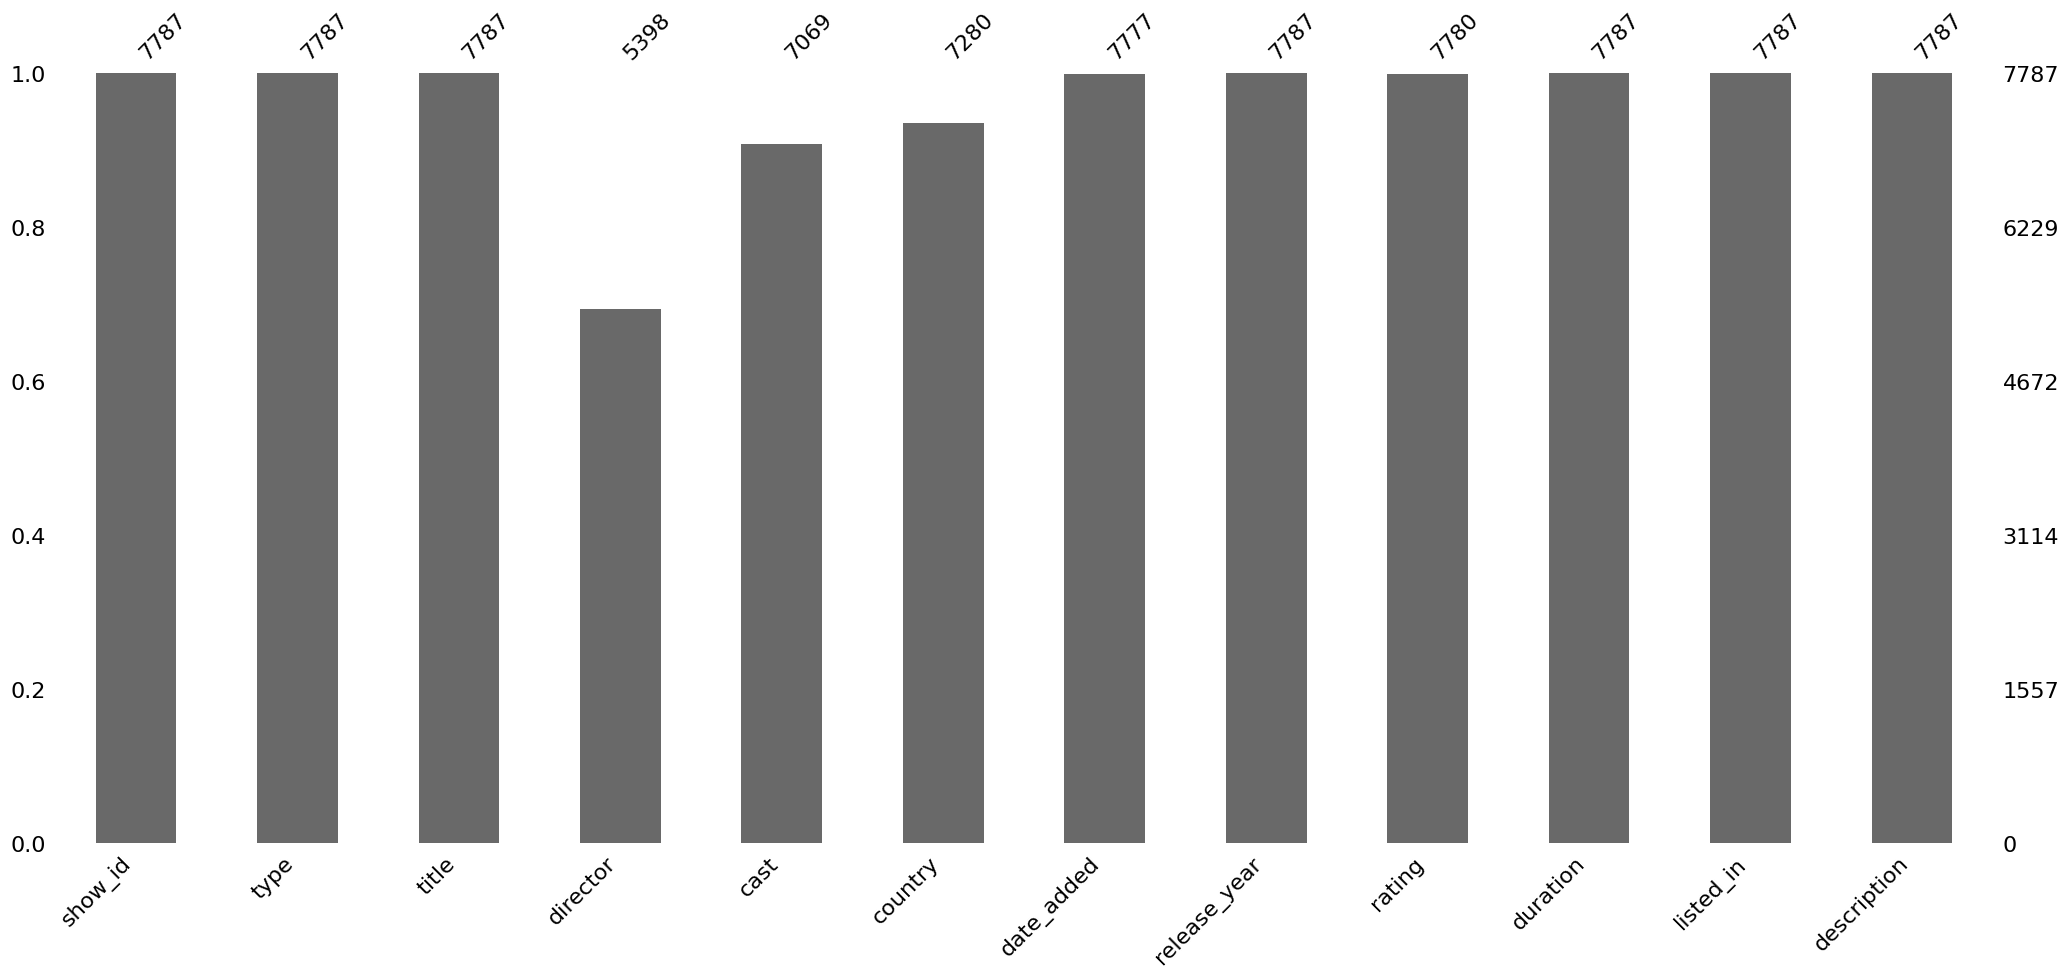

In [9]:
# Visualizing the missing values
msno.bar(df)

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description

**show_id** : Unique ID for every Movie / Tv Show

**type** : Identifier - A Movie or TV Show

**title** : Title of the Movie / Tv Show

**director** : Director of the Movie

**cast** : Actors involved in the movie / show

**country** : Country where the movie / show was produced

**date_added** : Date it was added on Netflix

**release_year** : Actual Releaseyear of the movie / show

**rating** : TV Rating of the movie / show

**duration** : Total Duration - in minutes or number of seasons

**listed_in** : Genere

**description**: The Summary description

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
# First convert date_added to date time format.
df["date_added"] = pd.to_datetime(df['date_added'])

# Compute day.
df['day_added'] = df['date_added'].dt.day

# Compute year.
df['year_added'] = df['date_added'].dt.year

# Compute mount.
df['month_added'] = df['date_added'].dt.month

tv_shows= df[df['type']=='TV Show']
movies= df[df['type']=='Movie']

movies.duration = movies.duration.str.replace(' min','').astype(int)

# duration manipulation for tv shows
tv_shows.rename(columns={'duration':'seasons'}, inplace=True)
tv_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
tv_shows.seasons = tv_shows.seasons.str.replace(' Seasons','').astype(int)

# Splitting datasets for movies and tv show
df_movies = df[df['type']=='Movie'].copy()
df_shows = df[df['type']=='TV Show'].copy()

# fixing data types
custom_rating = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['ratings_cat'] = df['rating'].replace(to_replace = custom_rating)
df['ratings_cat'].unique()

df['type'] = pd.Categorical(df['type'])

# ratings_cat is another category (4 classes)
df['ratings_cat'] = pd.Categorical(df['ratings_cat'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# changing dtype to string
df['type']= df['type'].astype('string')
df['title']= df['title'].astype('string')
df['director']=  df['director'].astype('string')
df['cast']= df['cast'].astype('string')
df['country']= df['country'].astype('string')
df['rating']= df['rating'].astype('string')
df['listed_in']= df['listed_in'].astype('string')
df['description']= df['description'].astype('string')

<ipython-input-13-6d2aace2d2c1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.duration = movies.duration.str.replace(' min','').astype(int)
<ipython-input-13-6d2aace2d2c1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows.rename(columns={'duration':'seasons'}, inplace=True)
<ipython-input-13-6d2aace2d2c1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [14]:
df['type'].index

RangeIndex(start=0, stop=7787, step=1)

### What all manipulations have you done and insights you found?

1. Made columns out of date column which give information about day , month and year.
2. Made seperate dataset for movies and tv series.
3. fixed thecategories rating column.
4. Changed the datatypes from object to string.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

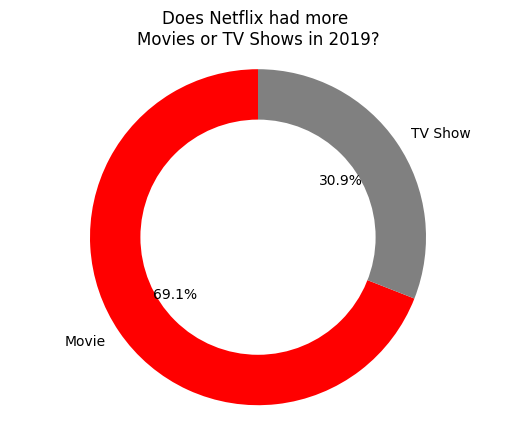

In [15]:
# Chart - 1 visualization code
def plot_donut_chart(df, col, colors, title):
    # Group the data by the specified column and calculate the counts
    group_counts = df[col].value_counts()

    # Create a donut chart
    fig, ax = plt.subplots()
    ax.pie(group_counts, labels=group_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    ax.set_title(title)

    # Add a circle in the center to create the donut shape
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(center_circle)

    # Display the chart
    plt.show()

plot_donut_chart(df= df, col='type', colors=['red','grey'], title='Does Netflix had more \nMovies or TV Shows in 2019?')


##### 1. Why did you pick the specific chart?

To compare the no. of movies and tv shows in a particular year.

##### 2. What is/are the insight(s) found from the chart?

Almost 70 % of the content on netflix was in movies format, and 30% was tv shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yse this insight show there is need to put more tv shows on the platform.

#### Chart - 2

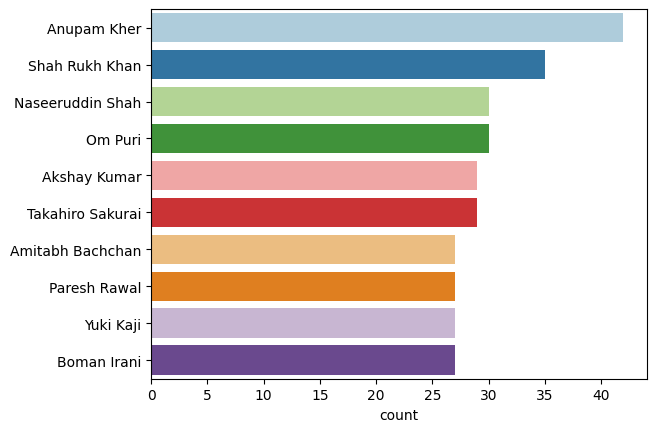

In [16]:
# Chart - 2 visualization code
actors = df[df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = actors, order=actors.value_counts().index[:10], palette='Paired')
plt.show()

##### 1. Why did you pick the specific chart?

To know the actors who are famous on the platform.

##### 2. What is/are the insight(s) found from the chart?

Anupam kher appeared in most mumber of content on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

this insight can be used to update content of the actors who are most viewed as people like them.

#### Chart - 3

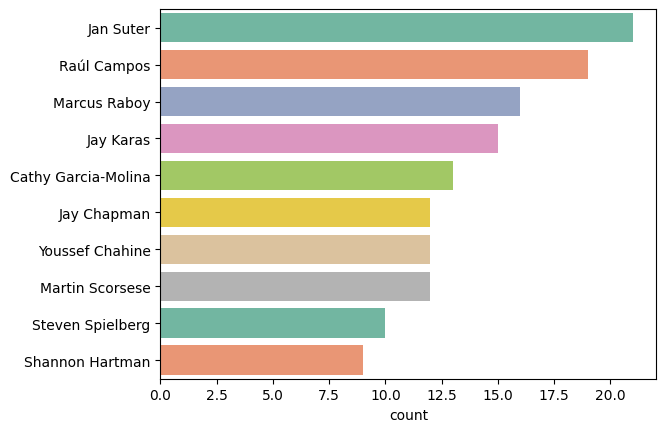

In [17]:
# Chart - 3 visualization code
# Graph for top 10 directors
directors = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='Set2')
plt.show()

##### 1. Why did you pick the specific chart?

To see top 10 directors on the platform.

##### 2. What is/are the insight(s) found from the chart?

we can see top 10 directors.

#### Chart - 4

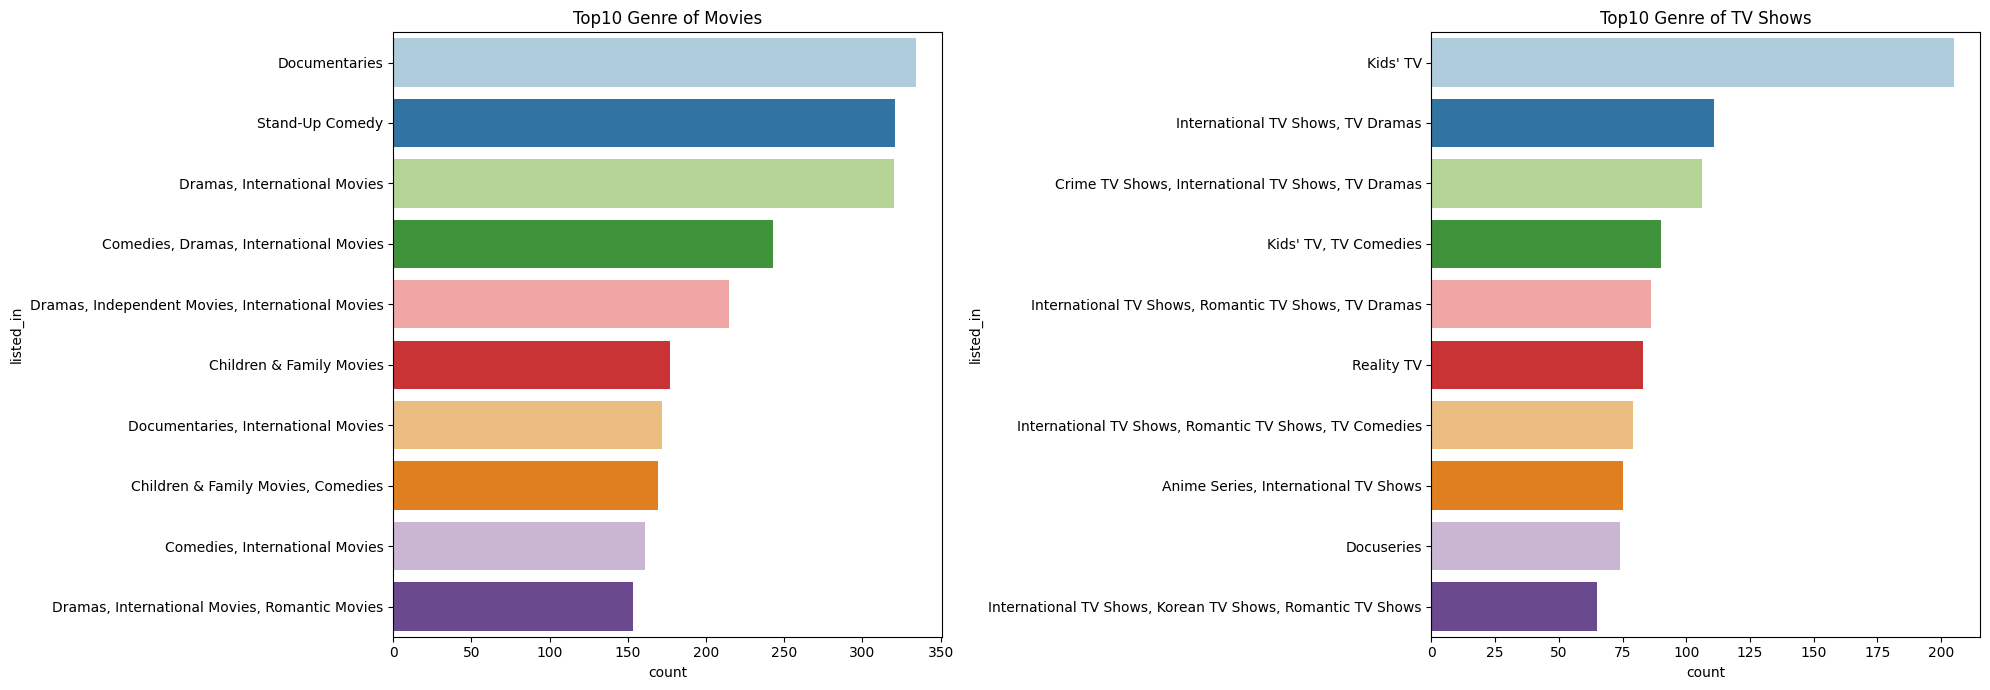

In [18]:
# Chart - 4 visualization code
# #Analysing top10 genre of the movies
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],  palette='Paired', ax=ax[0])
ax[0].set_title('Top10 Genre of Movies')
# #Analysing top10 genres of TVSHOWS
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10], palette='Paired', ax=ax[1])
ax[1].set_title('Top10 Genre of TV Shows')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

To compare the count of genre of tv shows and movies on the platform.

##### 2. What is/are the insight(s) found from the chart?

highest no. of content wew from genre documentries and kinds tv show.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight could be be used to know the prefernce of the customers vs what type of content is on the platorm. Updating content can increase the viewers watching experience.

#### Chart - 5

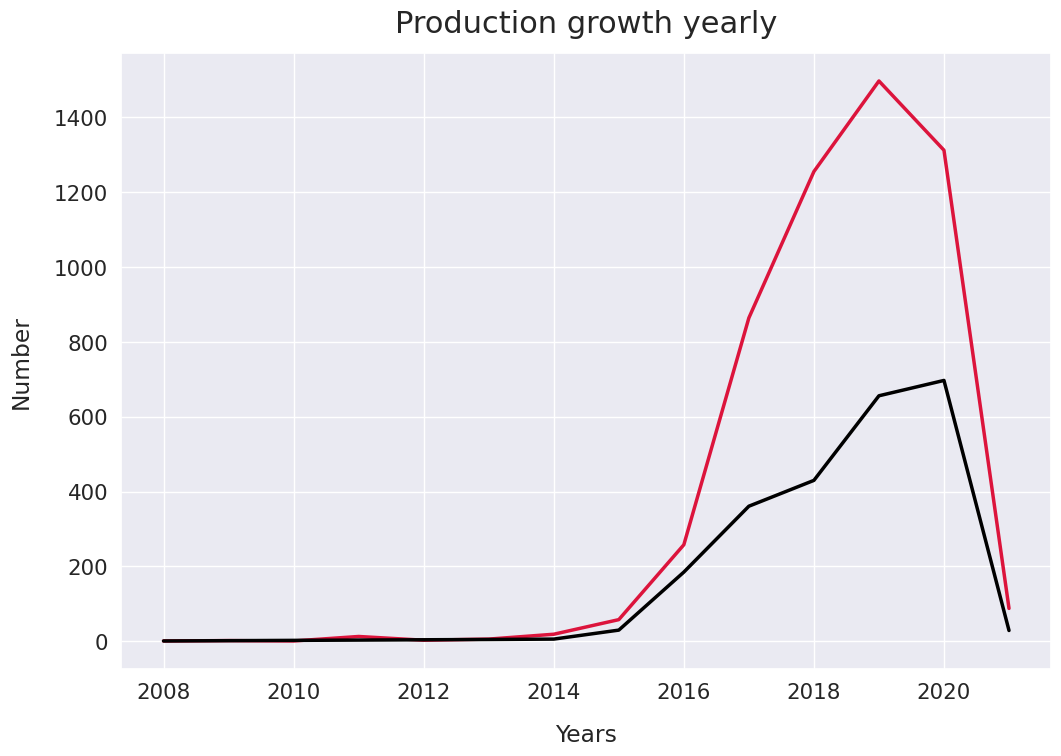

In [19]:
# Chart - 5 visualization code
# visualizing the movies and tv_shows based on the release year
movies_year =movies['year_added'].value_counts().sort_index(ascending=False)
tvshows_year =tv_shows['year_added'].value_counts().sort_index(ascending=False)
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='crimson',label="Movies per year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='black',label="TV Shows per year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

##### 1. Why did you pick the specific chart?

To check the production of movies and tv shows over the years.

##### 2. What is/are the insight(s) found from the chart?

Growth of movies and tv shows was comparable till 2016 but after that production of movies increases rapidly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

this insight pionts out  the need of uploading tv shows on the platform.

#### Chart - 6

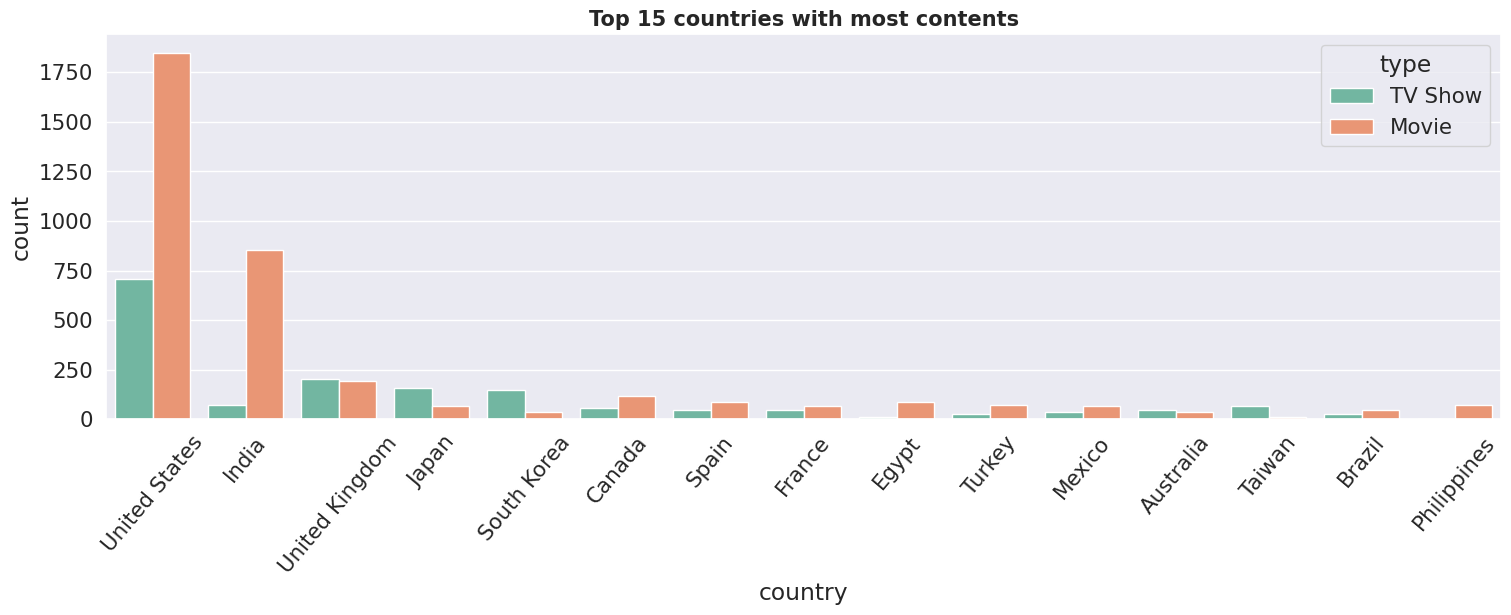

In [20]:
# Chart - 6 visualization code
#Analysing top15 countries with most content
plt.figure(figsize=(18,5))
sns.countplot(x= df['country'],order= df['country'].value_counts().index[0:15],hue= df['type'], palette='Set2')
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

To know from which country the number of uploads are highest

##### 2. What is/are the insight(s) found from the chart?

USA has the highest number of content on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

this information could be used to market netflix in the other nations where people of the country watches english content.

#### Chart - 7

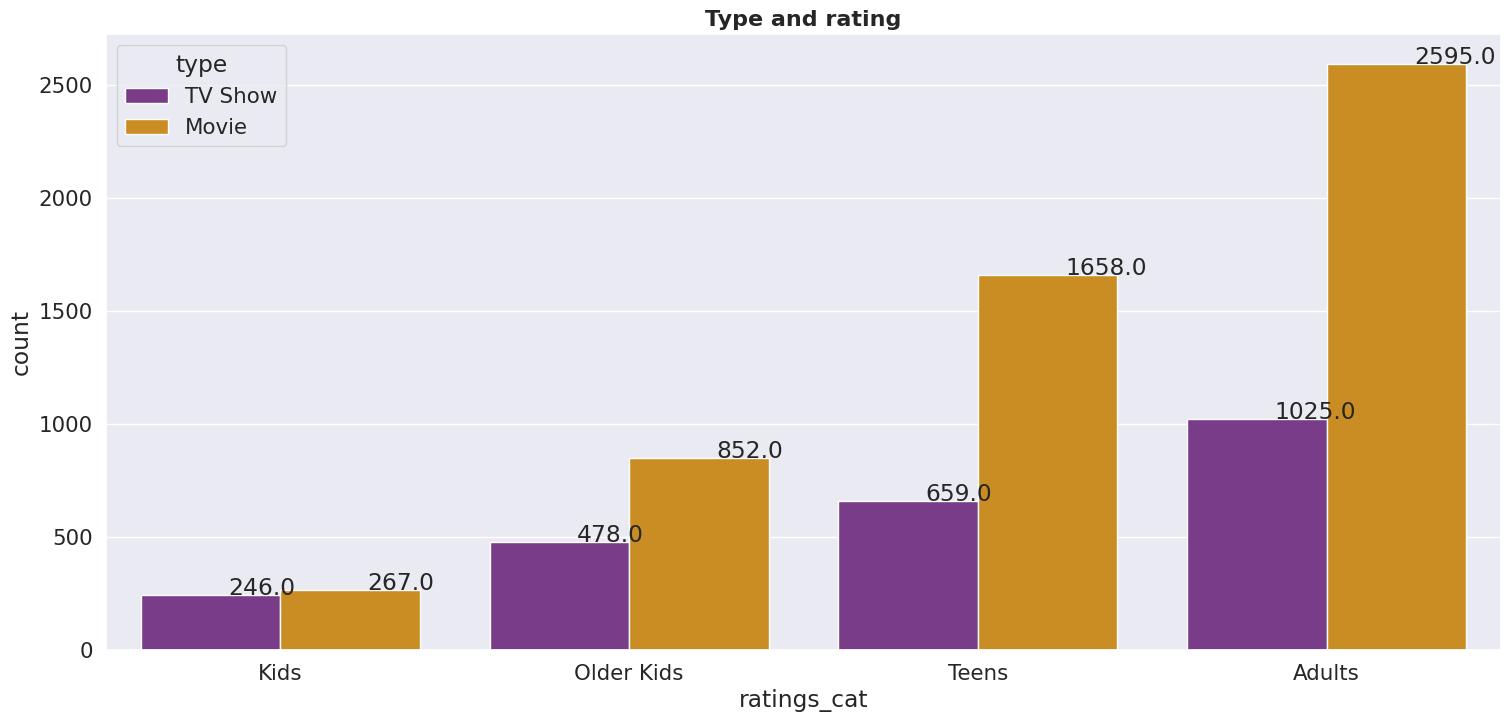

In [21]:
# Chart - 7 visualization code
# Rating
plt.figure(figsize=(18,8))
ax=sns.countplot(x='ratings_cat',hue='type', data= df,palette="CMRmap")
plt.title('Type and rating',size='16',fontweight="bold")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

##### 1. Why did you pick the specific chart?

Plotted the bar chart showing number of contents per rating category.

##### 2. What is/are the insight(s) found from the chart?

Most of the content on the platform were of adult rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

this insight can be used to know the viewers age and their preference.

#### Chart - 8

([<matplotlib.patches.Wedge at 0x7f185854a0b0>,
 [Text(-1.0999663543761926, -0.008603443516892913, 'Others'),
  Text(1.1999632956831192, 0.00938557474570121, 'Originals')],
 [Text(-0.5999816478415596, -0.004692787372850679, '50.25%'),
  Text(0.6999785891484862, 0.005474918601659039, '49.75%')])

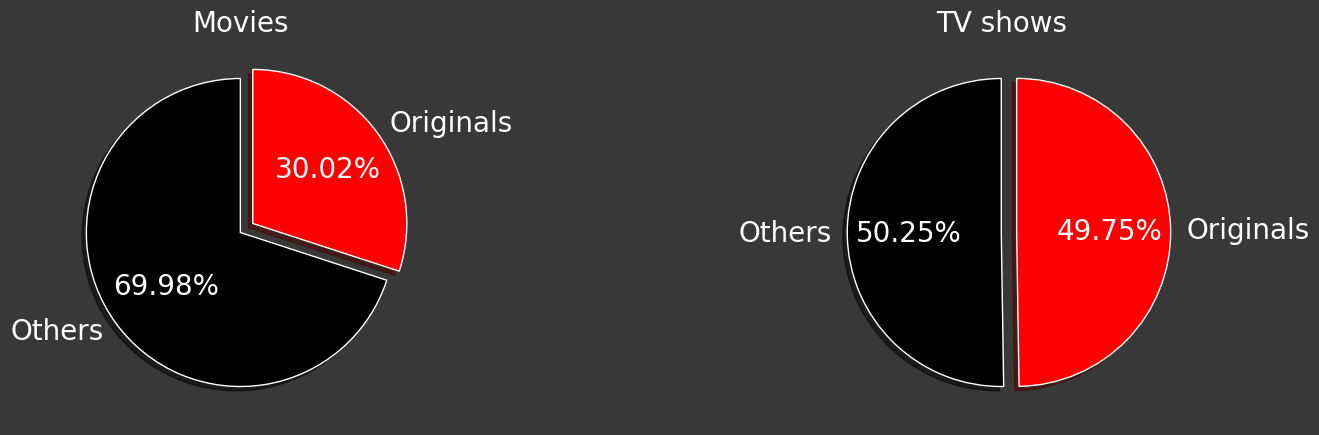

In [22]:

# Chart - 8 visualization code
df_movies['originals'] = np.where(df_movies['release_year'] == df_movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(18,5),facecolor="#383838")
explode = (0, 0.1)
ax[0].set_title('Movies', color='white', fontsize = 20)
ax[0].pie(df_movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"white", 'fontsize': 20}, colors =['black','red'])
# pie plot showing percentage of originals and others in TV_shows
df_shows['originals'] = np.where(df_shows['release_year'] == df_shows['year_added'], 'Yes', 'No')
ax[1].set_title('TV shows', color='white', fontsize = 20 )
ax[1].pie(df_shows['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"white", 'fontsize': 20}, colors =['black','red'])

##### 1. Why did you pick the specific chart?

To know how much of the content on the platform is original.

##### 2. What is/are the insight(s) found from the chart?

Almost 30% of the movies on the platform are original and 50% of tv shows are original.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

this information will help netflix to keep account of the original content that netfix makes.

#### Chart - 9 - Pair Plot

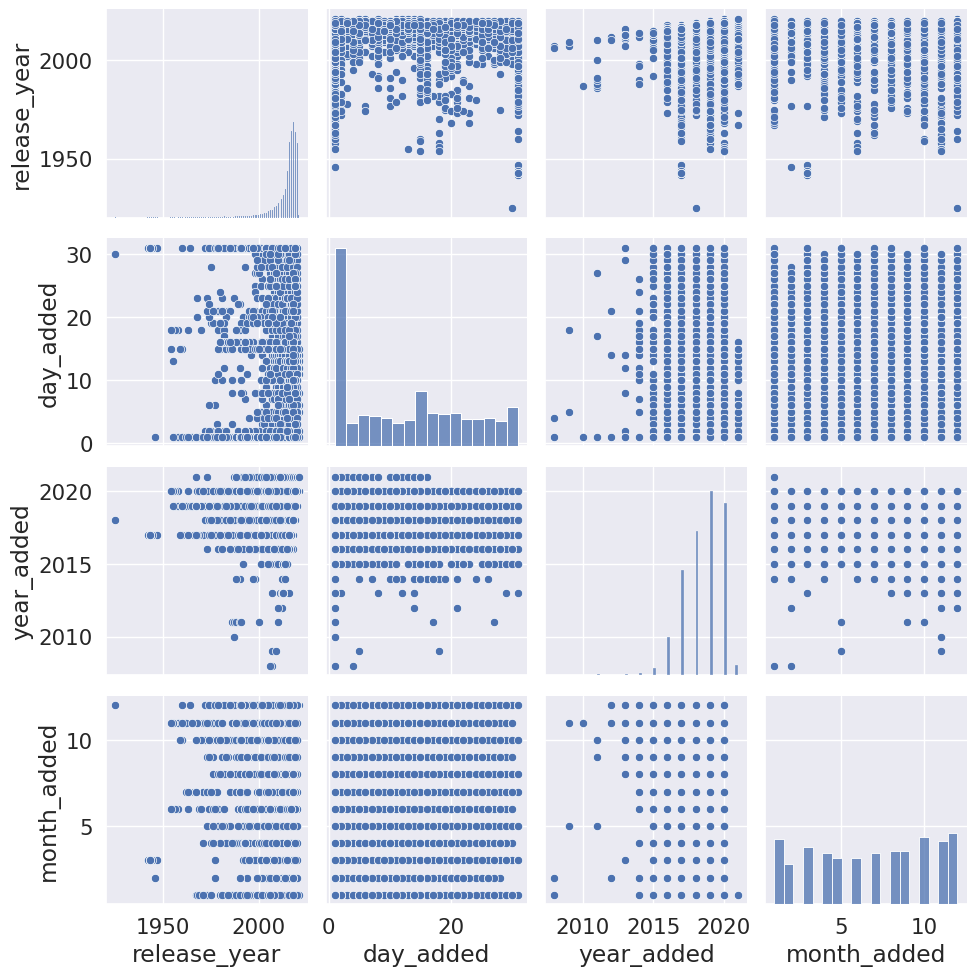

In [23]:
# Pair Plot visualization code
# Checking relation among all the columns once to do further analysis
sns.pairplot(data=df)

#####  What is/are the insight(s) found from the chart?

there are no direct relationship between numerical features.

## ***6. Feature Engineering & Data Pre-processing***

###  Handling Missing Values

In [24]:

# Handling Missing Values & Missing Value Imputation
df['director'].fillna('unknown', inplace=True)
df['cast'].fillna('unknown', inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)
df.dropna(subset=['date_added','day_added','year_added','month_added','rating','ratings_cat'],inplace=True)

In [25]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
day_added       0
year_added      0
month_added     0
ratings_cat     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

1. Replaced null values in cast and director column with unkown as it gives better information regarding missing name.
2. replaced null values in the country column with mode as missing country name will be most  probably the most frequently occuring one.
3. Dropped all the remaining null values for the other column as there were not many and it will not affect our dataset much.

###  Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [26]:
# Expand Contraction
cluster_df = df[['title']]
cluster_df['cluster_data'] = (df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()

<ipython-input-26-7fc931fe4af9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['cluster_data'] = (df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating']).astype(str)


cluster_data
title                                                   
3%     In a future where the elite inhabit an island ...
7:19   After a devastating earthquake hits Mexico Cit...
23:59  When an army recruit is found dead, his fellow...
9      In a postapocalyptic world, rag-doll robots hi...
21     A brilliant group of students become card-coun...

#### 2. Lower Casing

In [27]:
# Lower Casing
cluster_df['cluster_data'] = cluster_df['cluster_data'].str.lower()

<ipython-input-27-86d987addaed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['cluster_data'] = cluster_df['cluster_data'].str.lower()


#### 3. Removing Punctuations

In [28]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(5)

<ipython-input-28-e0b142cbc03f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)


cluster_data
title                                                   
3%     in a future where the elite inhabit an island ...
7:19   after a devastating earthquake hits mexico cit...
23:59  when an army recruit is found dead his fellow ...
9      in a postapocalyptic world ragdoll robots hide...
21     a brilliant group of students become cardcount...

#### 4. Removing Stopwords & Removing White spaces

In [29]:
# Remove Stopwords
# Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-29-b548ff4008fa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)


title
3%       future elite inhabit island paradise far crowd...
7:19     devastating earthquake hits mexico city trappe...
23:59    army recruit found dead fellow soldiers forced...
9        postapocalyptic world ragdoll robots hide fear...
21       brilliant group students become cardcounting e...
Name: cluster_data, dtype: object

#### 5. Text Normalization

In [30]:

# Normalizing Text (i.e., Stemming, Lemmatization etc.)

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

import nltk

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [31]:

cluster_df['cluster_data'] = lemmatize_verbs(cluster_df['cluster_data'])
cluster_df.head(5)

<ipython-input-31-62cf8a29a1e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['cluster_data'] = lemmatize_verbs(cluster_df['cluster_data'])


cluster_data
title                                                   
3%     future elite inhabit island paradise far crowd...
7:19   devastating earthquake hits mexico city trappe...
23:59  army recruit found dead fellow soldiers forced...
9      postapocalyptic world ragdoll robots hide fear...
21     brilliant group students become cardcounting e...

In [32]:
# tokenization
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lambda x: tokenizer.tokenize(x))

<ipython-input-32-095093b1ee85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lambda x: tokenizer.tokenize(x))


In [33]:
bag_of_words = cluster_df.cluster_data

##### Which text normalization technique have you used and why?

 I have used stemming for normalization of text. As stemming can help reduce the vocabulary size, which can be beneficial for tasks like clustering or classification.

#### 6. Text Vectorization

In [35]:
# Vectorizing Text
# Text Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
df['description'] = df['description'].fillna('')
def identity_tokenizer(text):
    return text
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english' ,lowercase=False, max_features = 20000)

#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(bag_of_words)

#shape of tfidf_matrix
tfidf_matrix.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


(7770, 20000)

##### Which text vectorization technique have you used and why?

 TF-IDF will transform the text into meaningful representation of integers or numbers which is used to fit machine learning algorithm for predictions.

In [36]:
#X_rescale=stdscaler.fit_transform(X_features)
X= tfidf_matrix.toarray()


**Performed PCA**

In [37]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

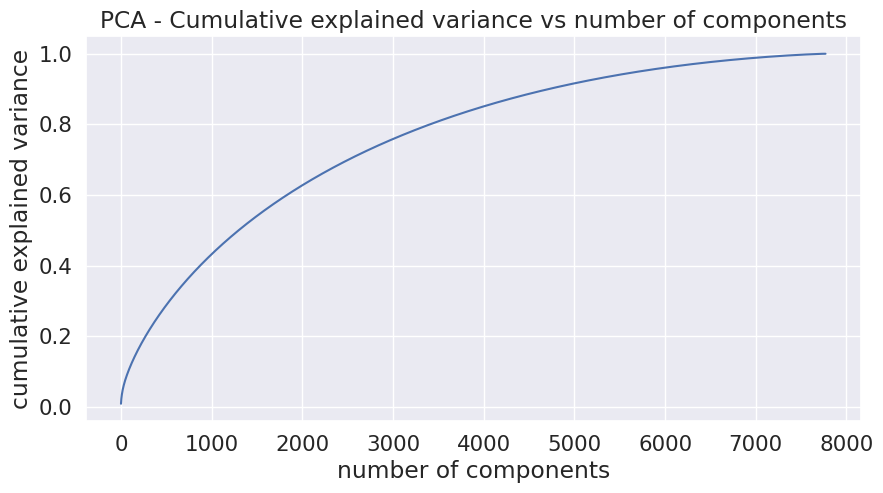

In [38]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

We can see 5000 components we explainng more than 90% of the variance. So we can select number of components as 5000.

In [39]:
pca = PCA(n_components=5000,random_state=42)
pca.fit(X)

PCA(n_components=5000, random_state=42)

In [40]:
x_pca = pca.transform(X)

In [41]:
x_pca.shape

(7770, 5000)

## ***7. ML Model Implementation***

**K means**

K-means clustering is a popular unsupervised machine learning algorithm used to partition data points into groups based on their similarities. It works by iteratively assigning data points to the nearest cluster centroid and updating the centroids based on the assigned points. The goal is to minimize the sum of squared distances between data points and their assigned centroids. K-means clustering is widely used for tasks like customer segmentation, image compression, and anomaly detection, providing a simple yet effective way to discover patterns and structure in data.

In [42]:
# ML Model - 1 Implementation
# ML Model - 1 K means

from sklearn.cluster import KMeans
k_clusters = 4
# Fit the Algorithm
model = KMeans(n_clusters=k_clusters, init='k-means++', random_state=2)
model.fit(x_pca)
# Predict on the model
clusters = model.predict(x_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
# Evaluate the silhouette score :
from sklearn.metrics import silhouette_score
score = silhouette_score(x_pca, clusters)
print("Silhouette score is {}".format(score))

Silhouette score is 0.007432397786968714


In [44]:
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,10)]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(x_pca)
    centers = clusterer.cluster_centers_

    score = silhouette_score(x_pca, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 4)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.005208973997408719


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.006226587786318659


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.0074948919638335625


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.007401594946237018


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.006514500611238902


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.00563678445928858


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.005655443415972697


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.006537977732862628


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [45]:
# Visualizing evaluation Metric Score chart
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp = temp.reset_index(drop=True)
temp.head(15)

n clusters  silhouette score
0           4            0.0075
1           5            0.0074
2           6            0.0065
3           9            0.0065
4           3            0.0062
5           8            0.0057
6           7            0.0056
7           2            0.0052

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.005198825453700722


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.006325403854409896


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.007522227782289552


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.008477107511008171


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.006444034924604902


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.0035523817631607784


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.003990610621914816


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.004261954018831743


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.0052002884590263525


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11 The average silhouette_score is : 0.005397601805528165


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12 The average silhouette_score is : 0.006220935293815579


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13 The average silhouette_score is : 0.0058355535745673644


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14 The average silhouette_score is : 0.0065855354965189145


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 15 The average silhouette_score is : 0.005279432836404424


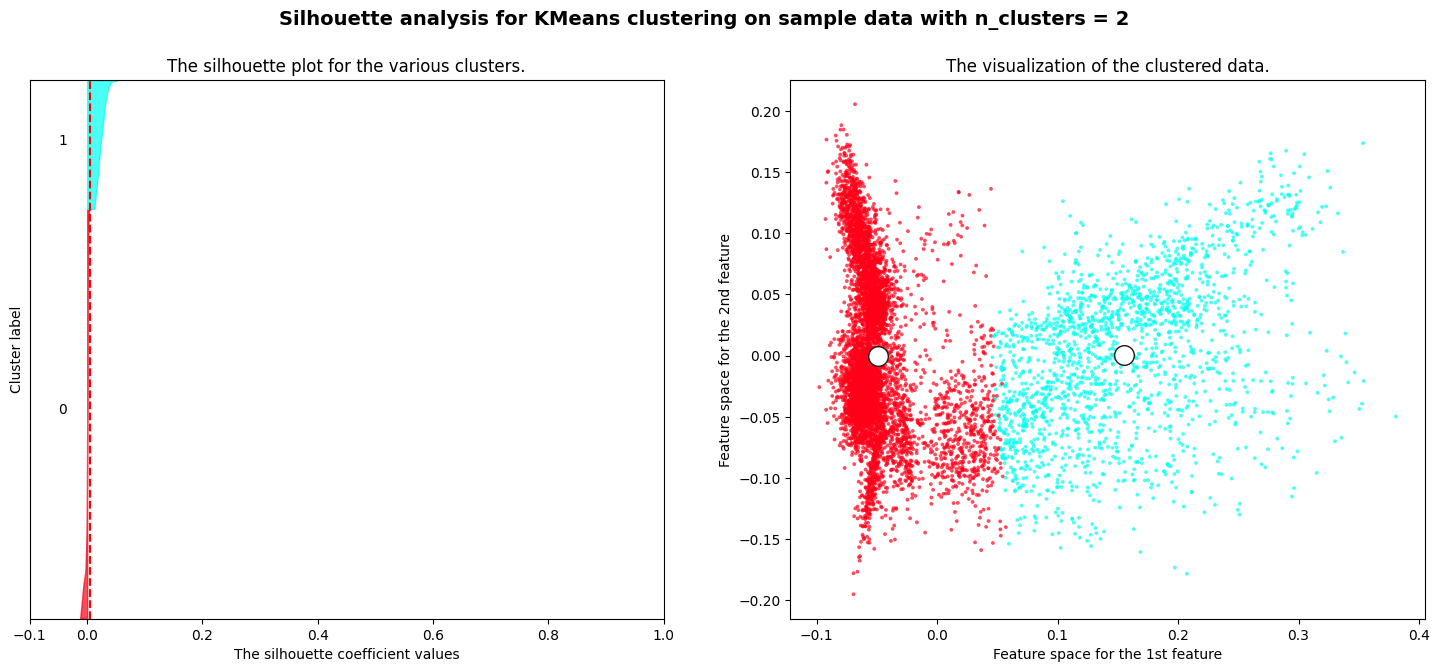

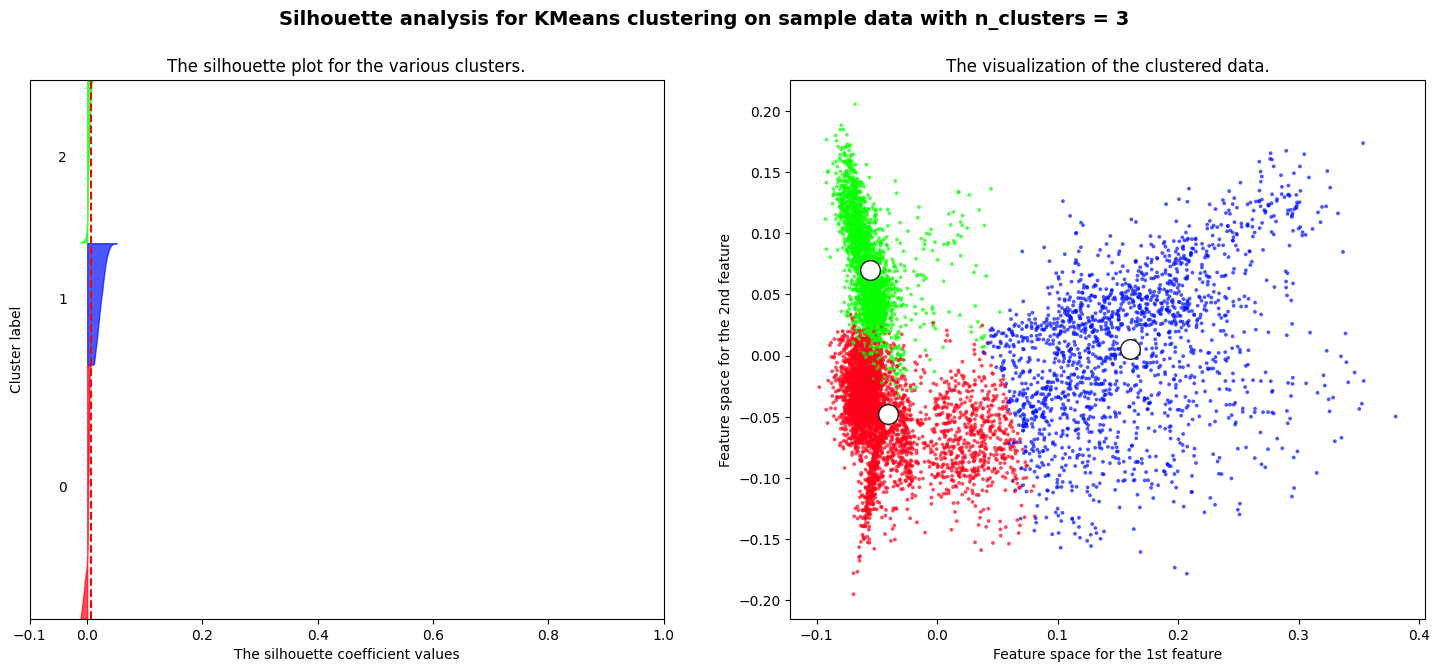

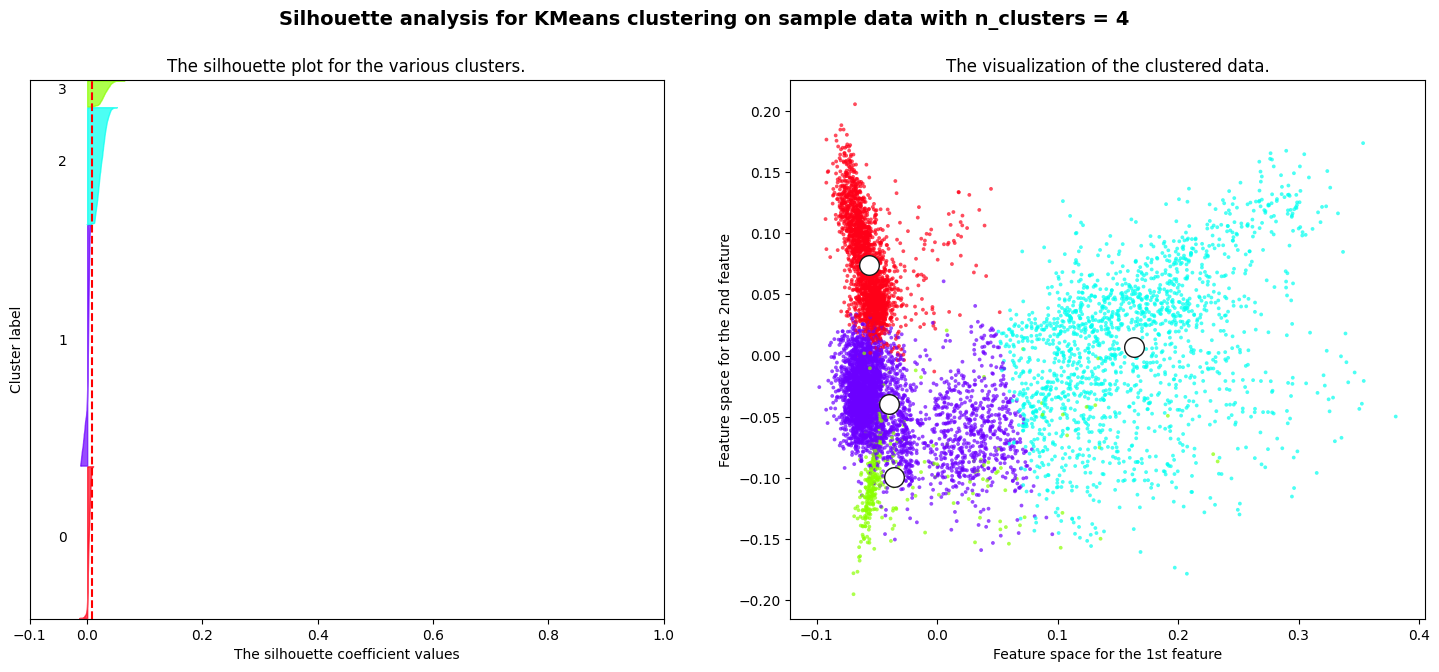

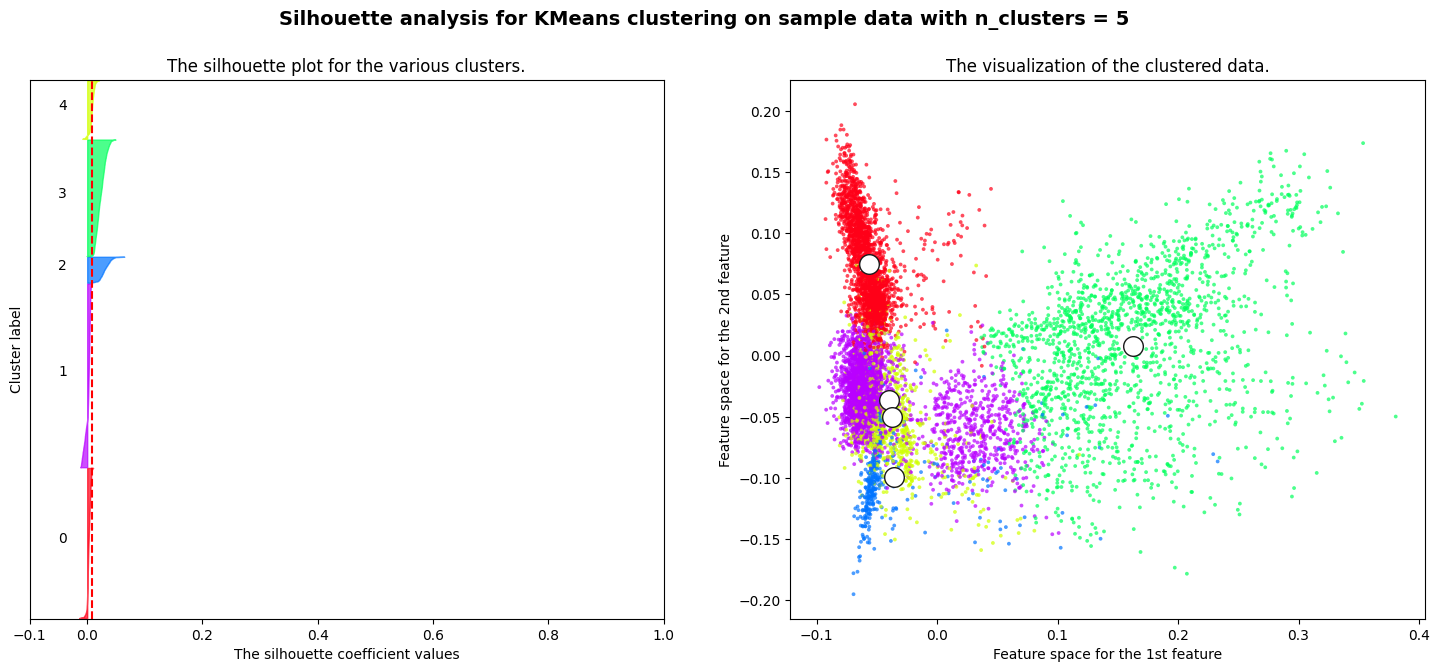

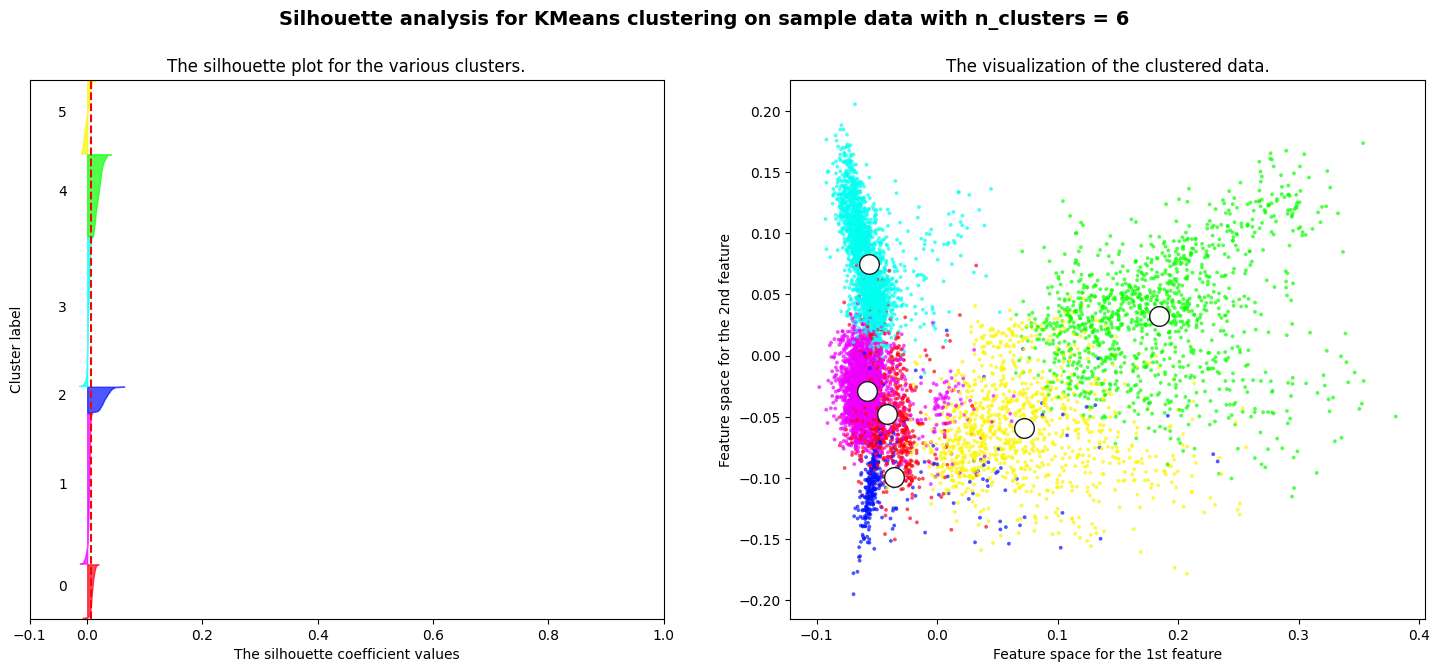

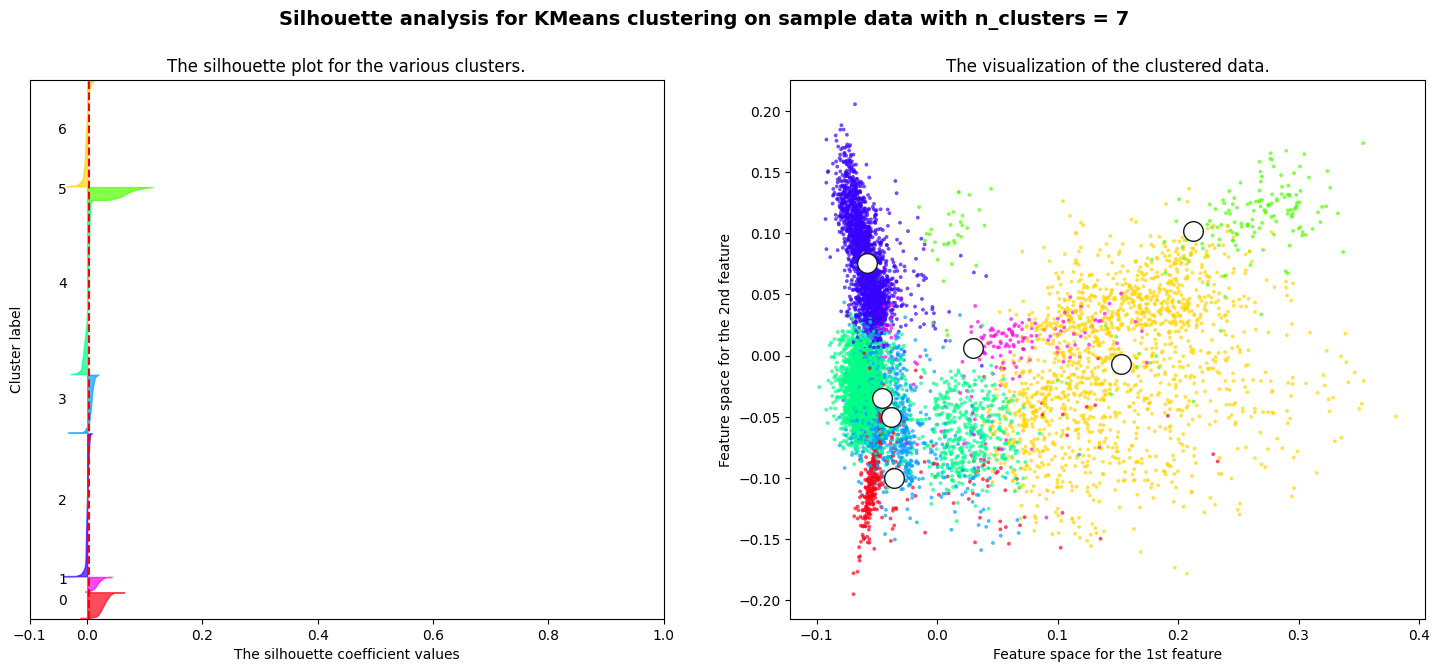

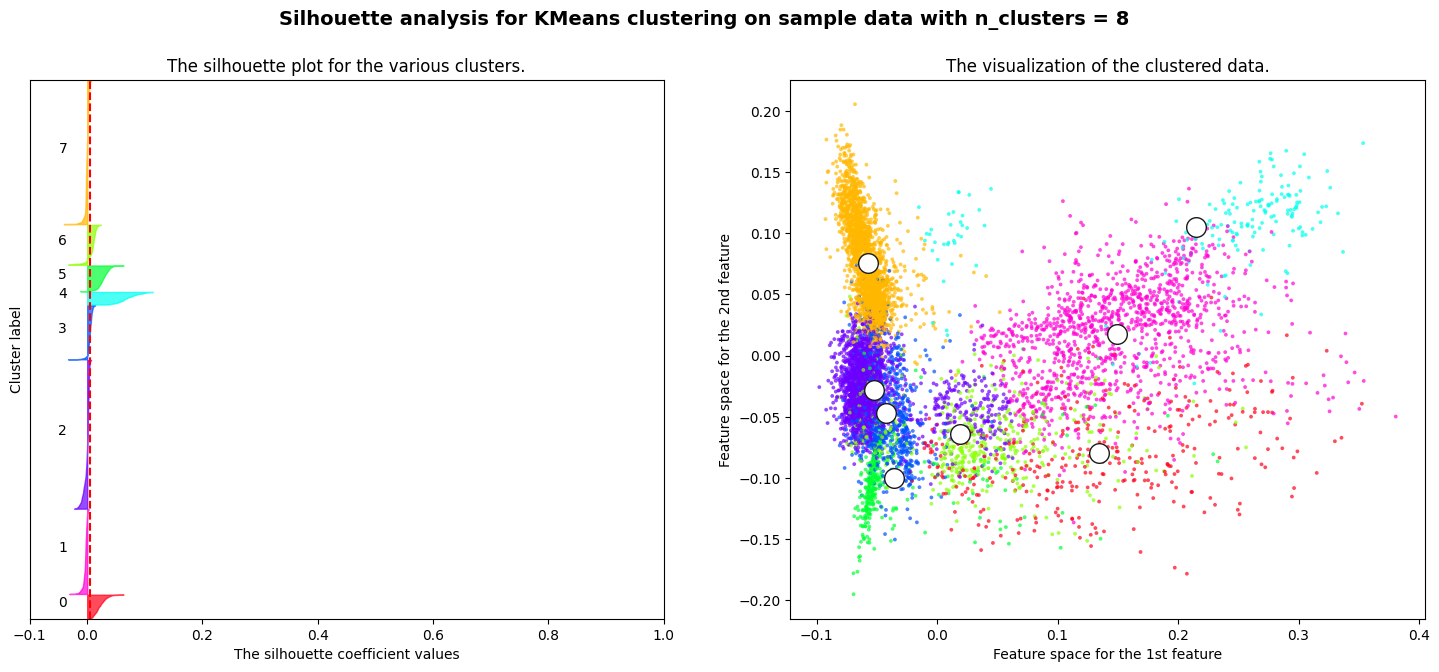

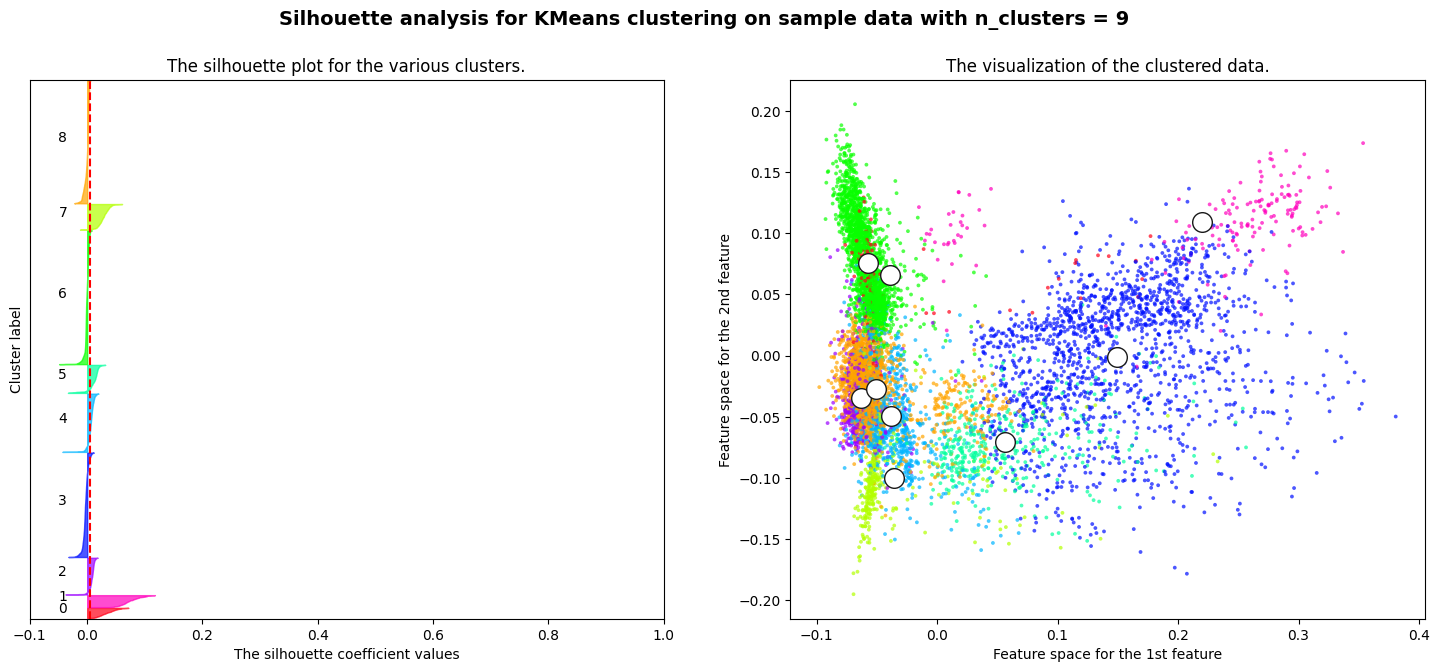

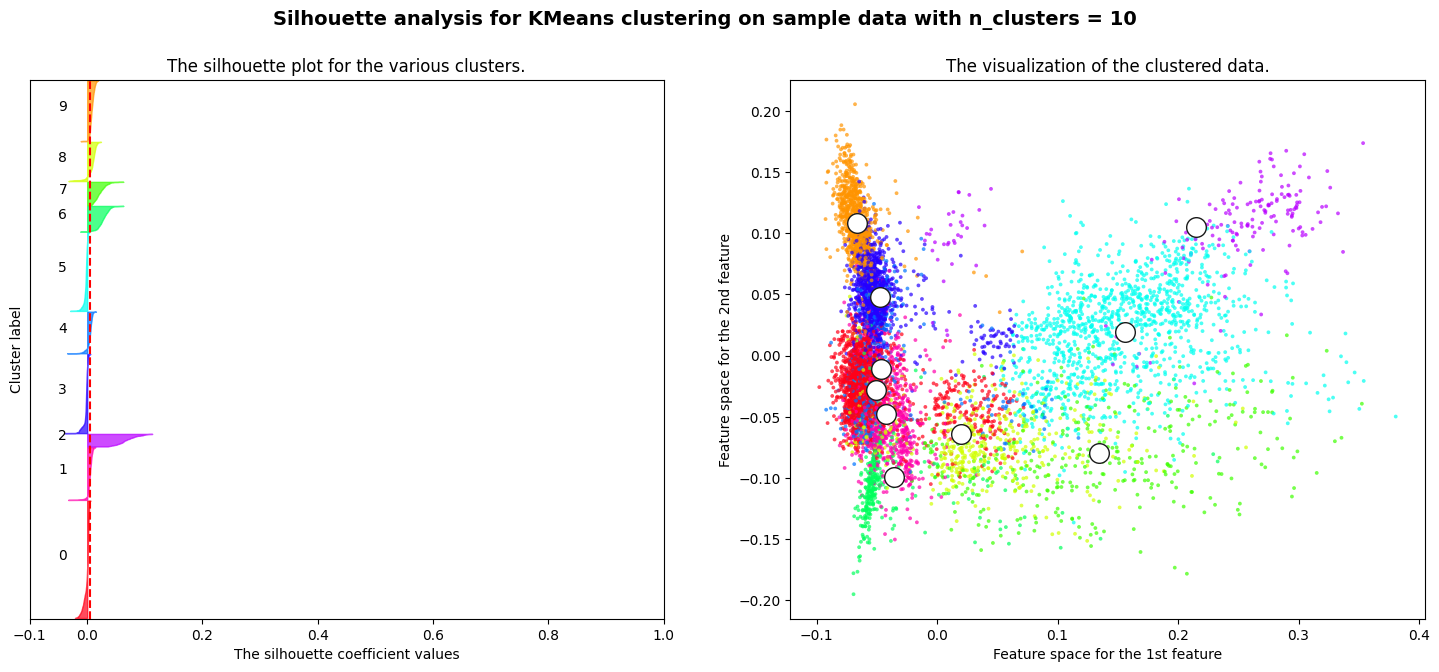

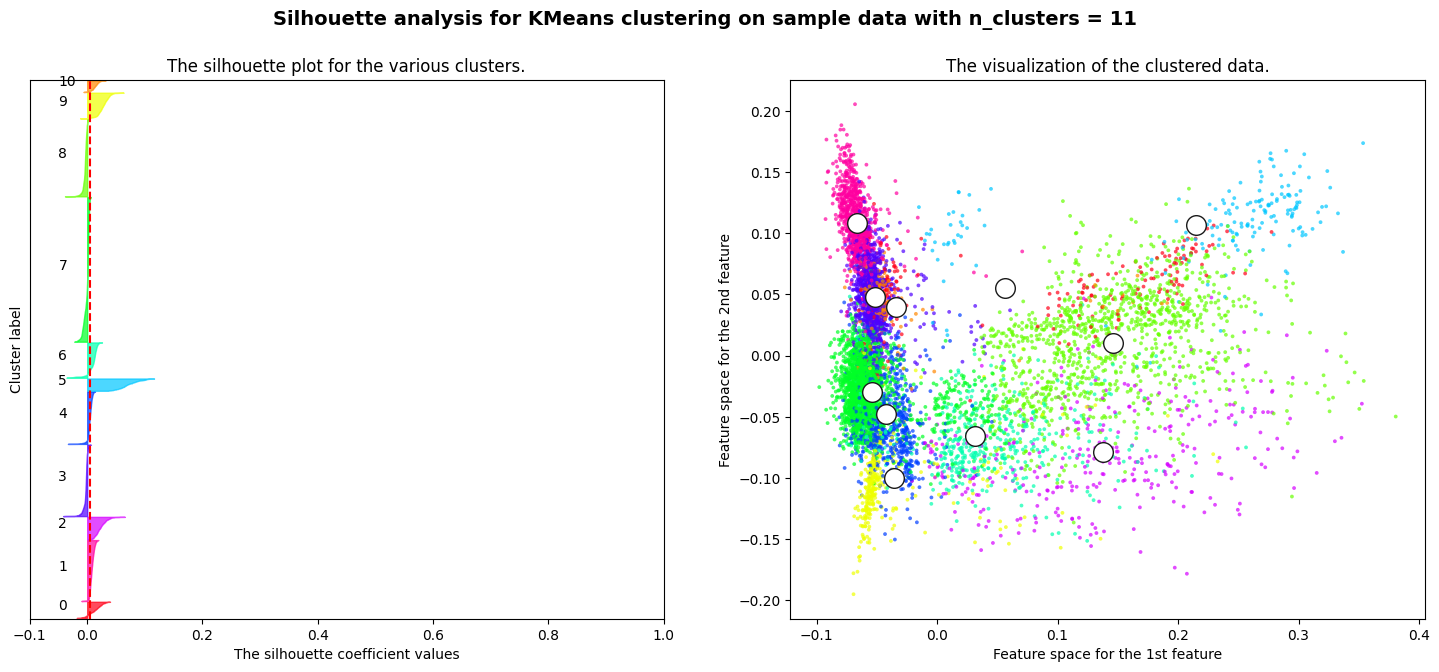

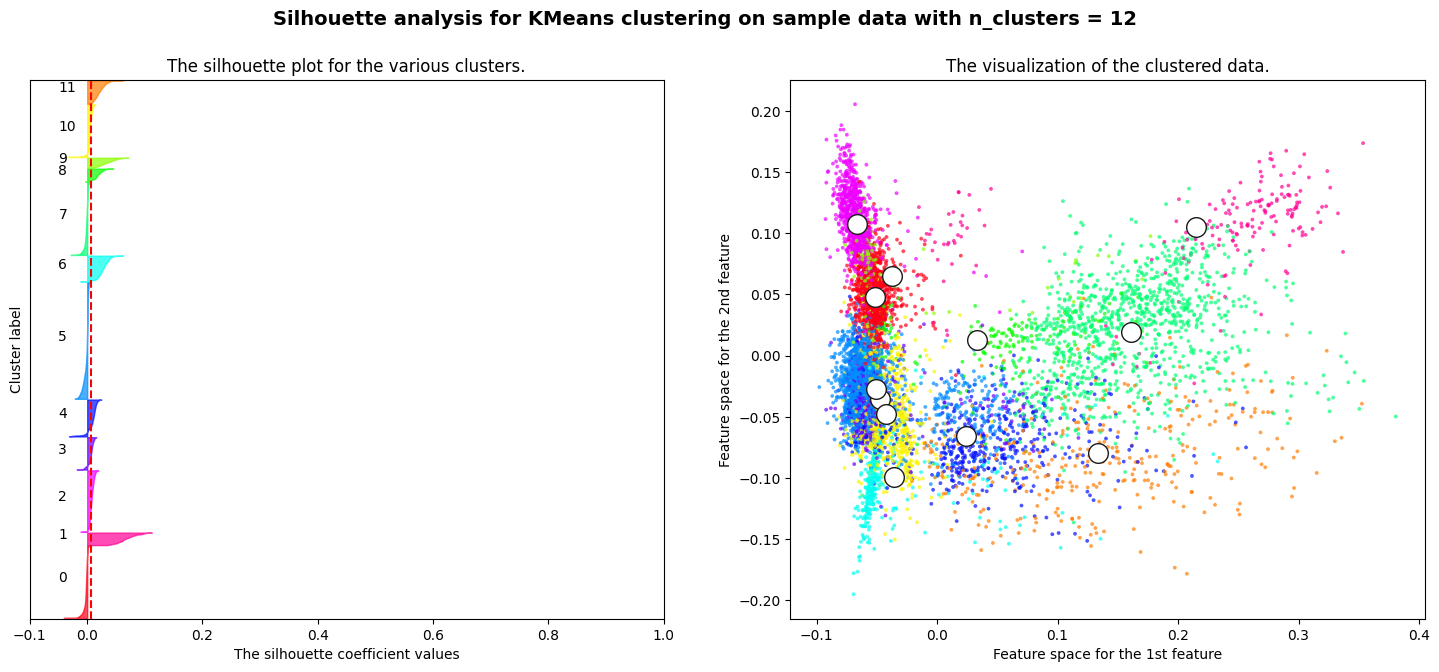

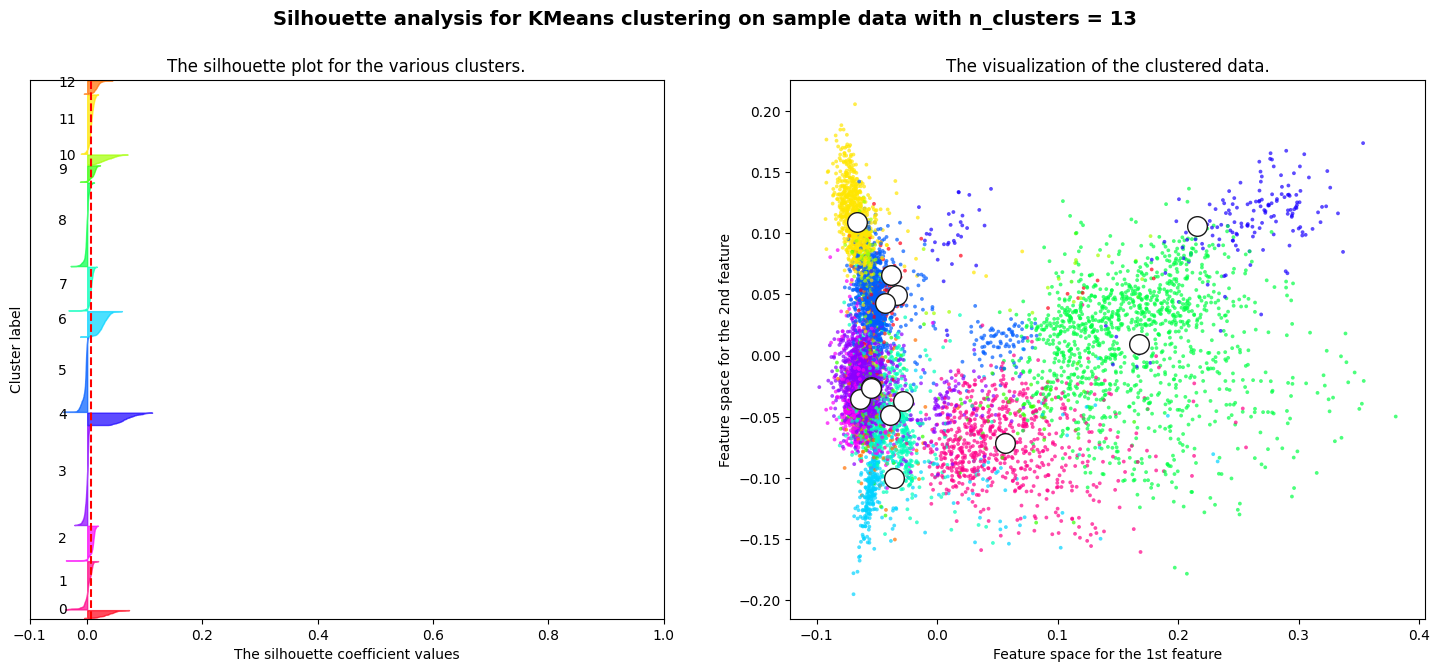

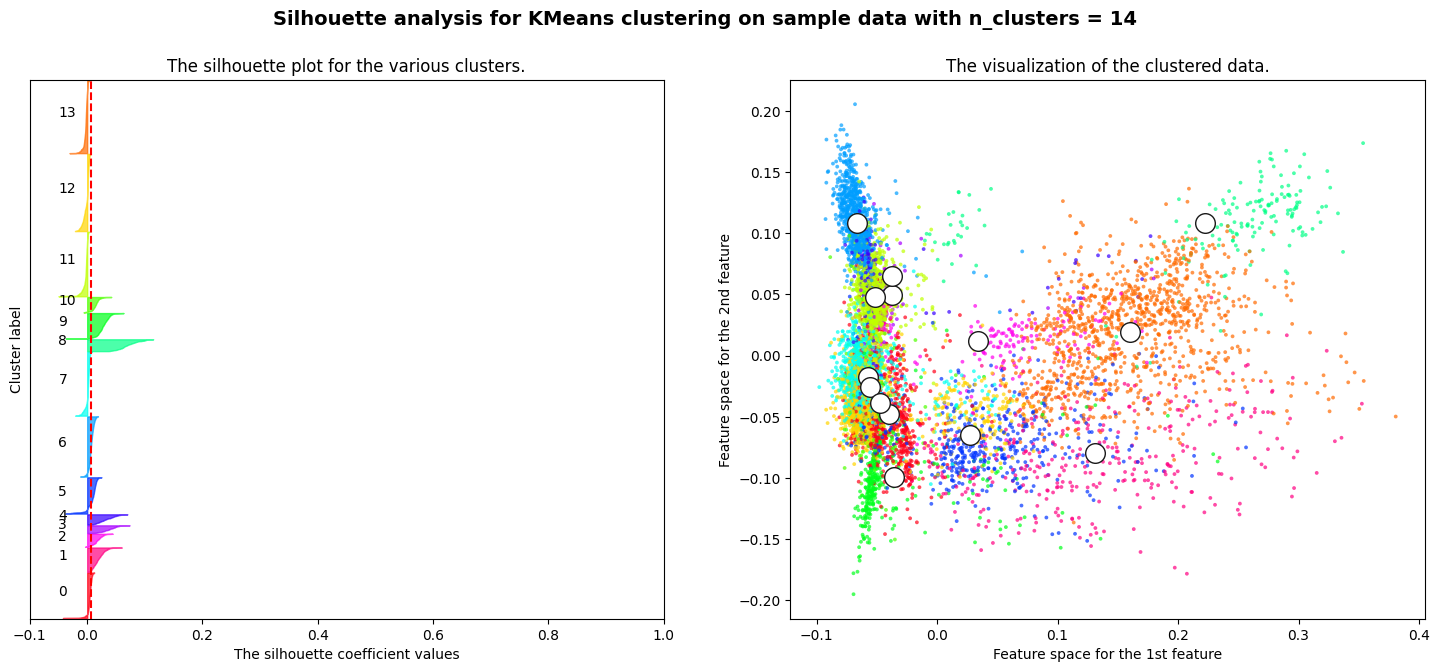

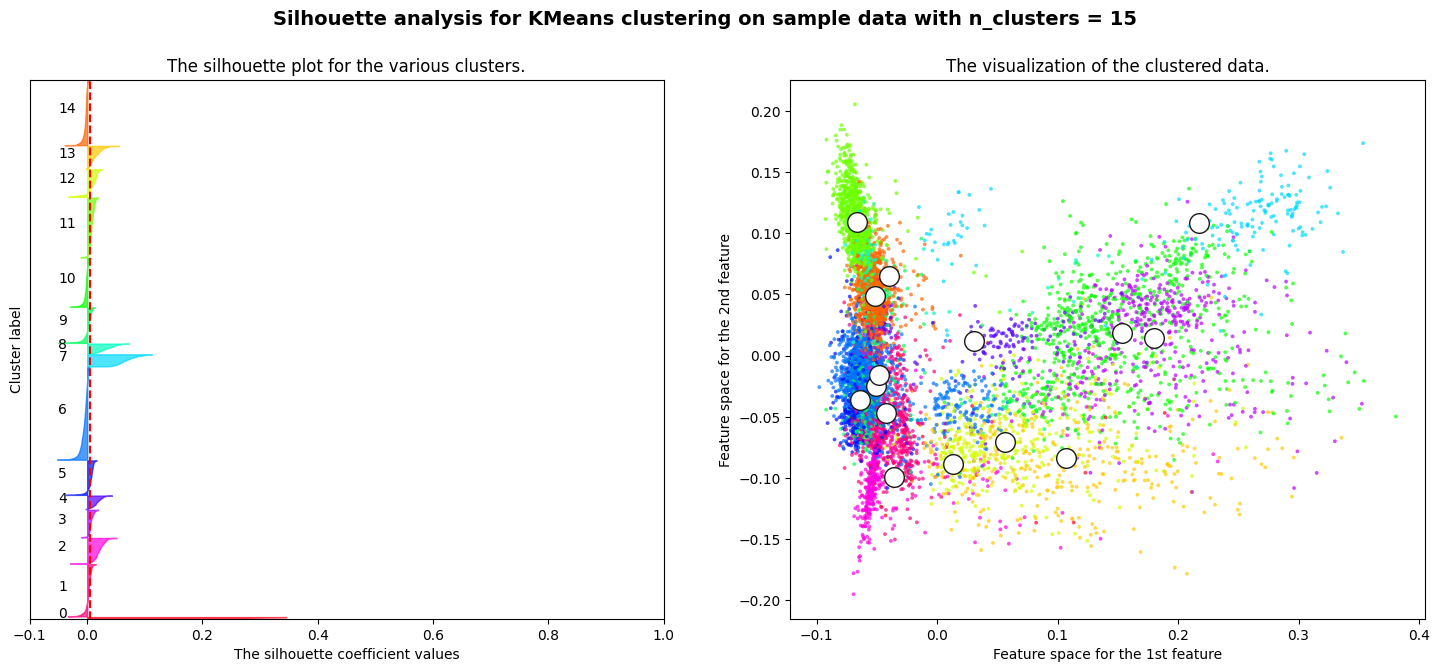

In [54]:
range_n_clusters = [i for i in range(2,16)]
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns :

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]

    ax1.set_xlim([-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(x_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

    silhouette_avg = silhouette_score(x_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


    # Compute the silhouette scores for each sample :

    sample_silhouette_values = silhouette_samples(x_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them :

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.hsv_r(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle :

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    #ax1.set_facecolor("white")
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.grid(False)

    # The vertical line for average silhouette score of all the values :

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed :

    colors = cm.hsv_r(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(x_pca[:, 0], x_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters :

    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers :

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')



    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.grid(False)
    #ax2.set_facecolor("white") :

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Elbow method**

The elbow method is a technique used to determine the optimal number of clusters (K) in a clustering algorithm. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters. As the number of clusters increases, the WCSS tends to decrease since each data point can be assigned to a smaller and more compact cluster. However, at a certain point, the rate of decrease in WCSS slows down, resulting in an elbow-like bend in the plot. The number of clusters corresponding to this elbow point is considered the optimal value of K, as it balances the trade-off between compactness and simplicity of the clustering solution.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

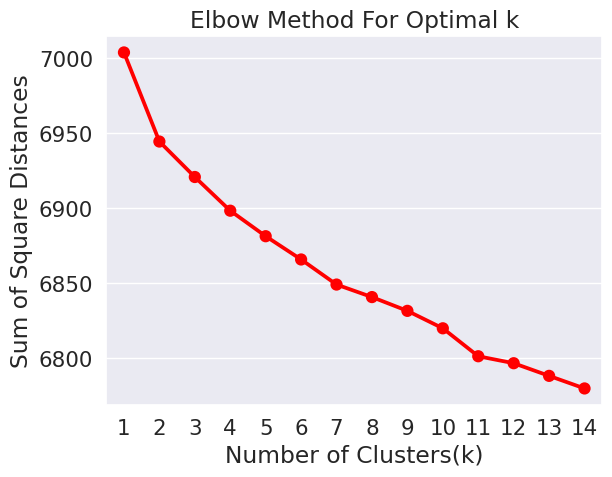

In [47]:
#  Implementation of elbow method
sum_of_square_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(x_pca)
    sum_of_square_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters :

sns.pointplot(x = list(sum_of_square_dist.keys()), y = list(sum_of_square_dist.values()),color="red")
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


Elnow method is showing optimal value of K as 11

In [55]:

kmeans = KMeans(n_clusters = 11 )
# fit the model
kmeans.fit(x_pca)
# predict on the model
y_kmeans= kmeans.predict(x_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


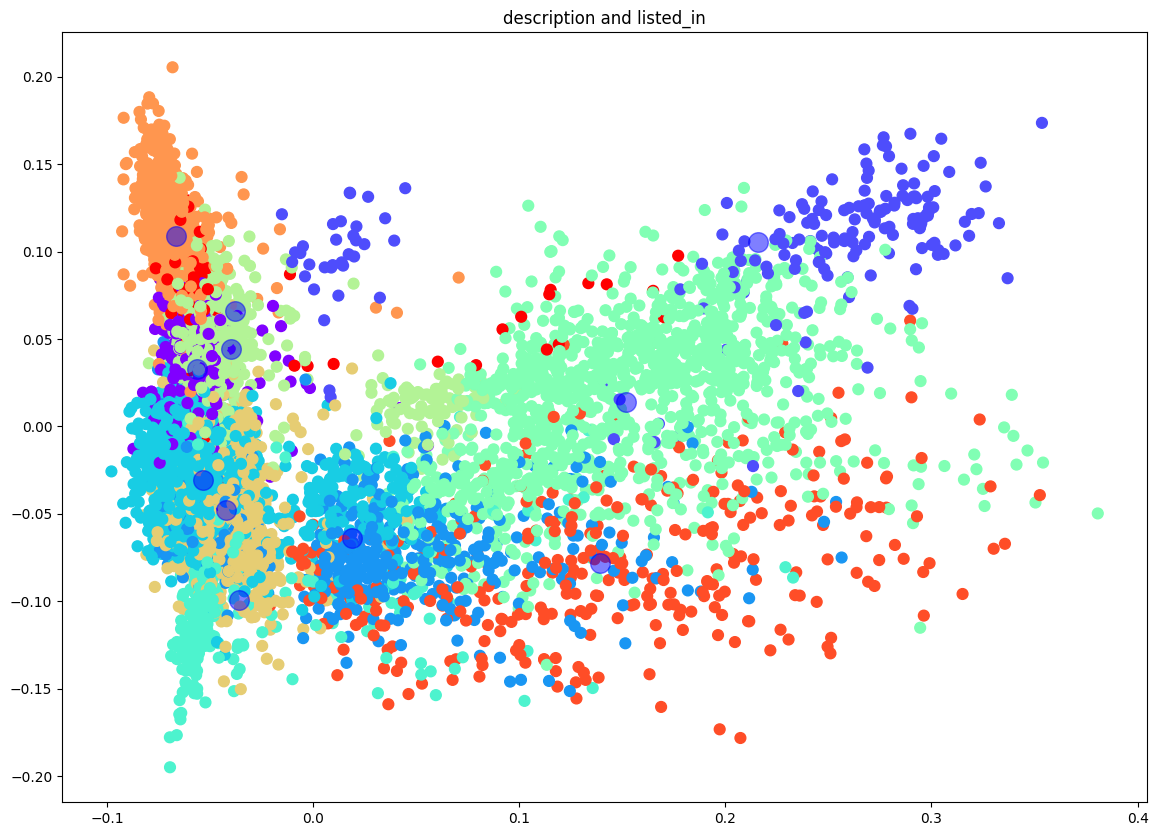

In [56]:
plt.figure(figsize=(14,10))
plt.title('description and listed_in')
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_kmeans, s=60, cmap='rainbow')
#plt.grid(b=None)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

**DBSCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm in data mining and machine learning. It groups data points based on their density and spatial proximity. DBSCAN identifies dense regions as clusters and considers data points that are sufficiently close to each other as part of the same cluster, while points that are in low-density regions are considered noise or outliers. It is effective in discovering clusters of arbitrary shape and size, without requiring prior knowledge of the number of clusters.

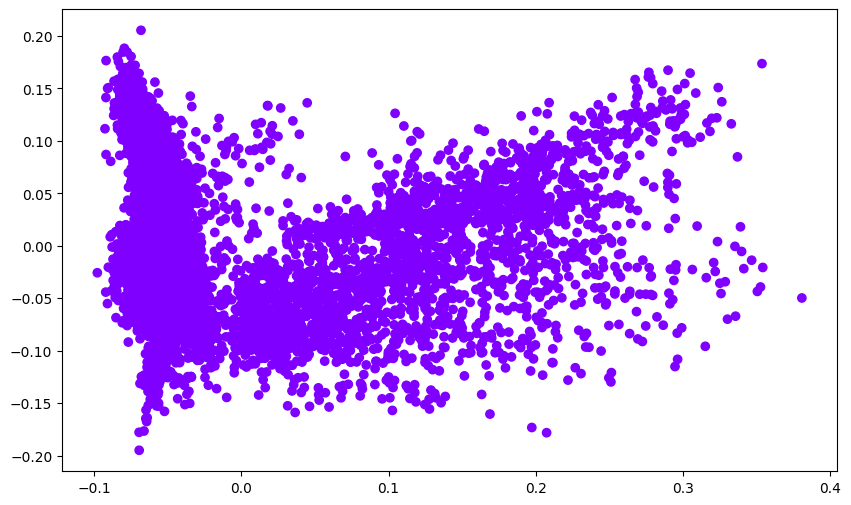

In [57]:
# Visualizing evaluation Metric Score chart
# ML Model - 3 Implementation
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=20).fit_predict(X)
plt.figure(figsize=(10,6))
#plt.grid(b=None)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_pred, cmap='rainbow')


**Hierarchal Clustering**

Hierarchical clustering is a method used to group similar data points into clusters based on their pairwise distances. It creates a hierarchical structure of clusters, represented visually using a dendrogram. A dendrogram is a tree-like diagram where each data point starts as an individual cluster and gradually merges into larger clusters as the distance between them decreases. The height of the branches in the dendrogram represents the similarity or dissimilarity between clusters. By observing the dendrogram, we can identify clusters at different levels of granularity and make decisions about the number of clusters to select based on the desired level of similarity or dissimilarity.

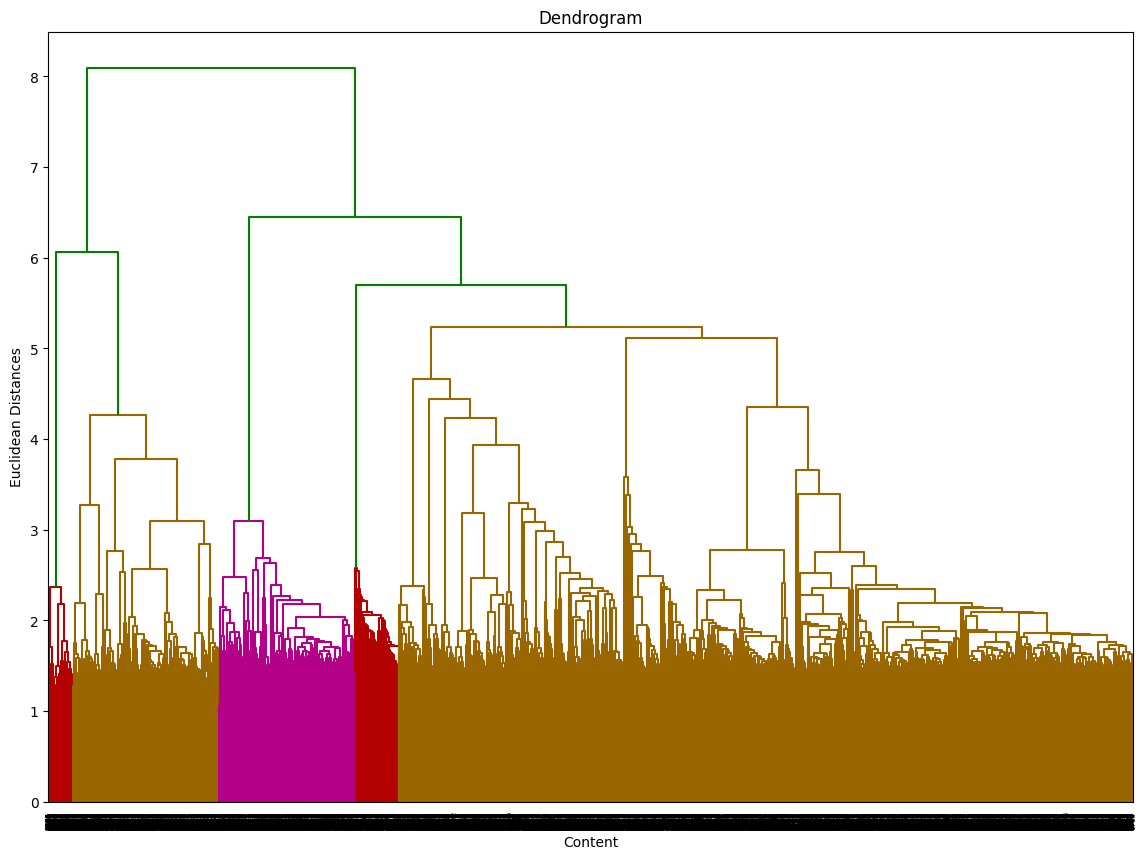

In [58]:
#  importing sch :
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(14,10))
plt.style.use('default')
sch.set_link_color_palette(['#b30000','#996600', '#b30086'])
dendrogram = sch.dendrogram(sch.linkage(x_pca, method = 'ward'),above_threshold_color="green")
plt.axhline(y=70, color='r', linestyle='--')
# find largest vertical distance we can make without crossing any other horizontal line :
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

**Agglomerative clustering** is a hierarchical clustering algorithm that starts with each data point as a separate cluster and gradually merges them based on their similarity. The algorithm iteratively combines the closest clusters until a termination condition is met, resulting in a hierarchical tree-like structure called a dendrogram. Agglomerative clustering is based on the "bottom-up" approach, where clusters are formed by merging similar instances, making it useful for exploring relationships and identifying hierarchical structures within the data.

In [61]:
# Model 5 implementation
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
# predict on the model
y_hc = hc.fit_predict(x_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


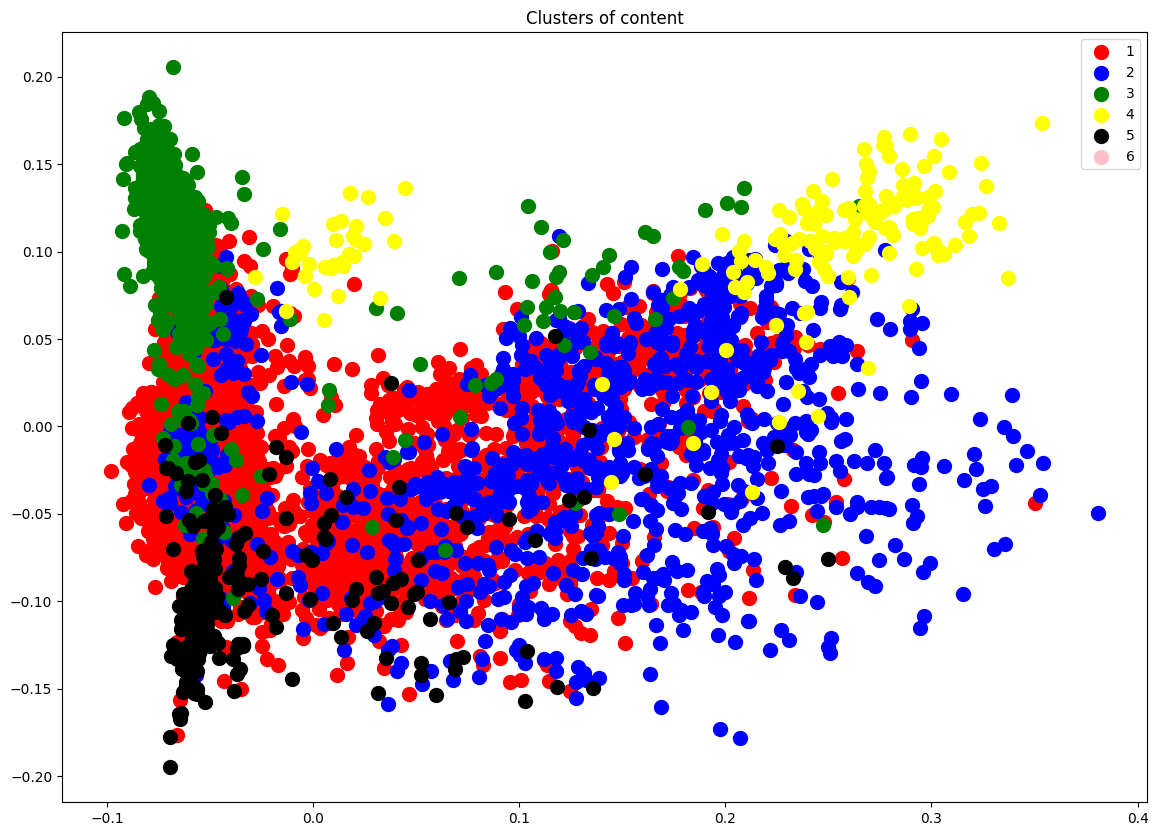

In [62]:
# Visualizing the clusters :
plt.figure(figsize=(14,10))
plt.scatter(x_pca[y_hc == 0, 0], x_pca[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(x_pca[y_hc == 1, 0], x_pca[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(x_pca[y_hc == 2, 0], x_pca[y_hc == 2, 1], s = 100, c = 'green', label = '3')
plt.scatter(x_pca[y_hc == 3, 0], x_pca[y_hc == 3, 1], s = 100, c = 'yellow', label = '4')
plt.scatter(x_pca[y_hc == 4, 0], x_pca[y_hc == 4, 1], s = 100, c = 'black', label = '5')
plt.scatter(x_pca[y_hc == 5, 0], x_pca[y_hc == 5, 1], s = 100, c = 'pink', label = '6')


#plt.grid(b=None)
plt.title('Clusters of content')
plt.legend()
plt.show()

# **Conclusion**

I tried 5 models for ML i.e.

* K-means clustering
* Elbow curve
* DBSCAN
* Hierarchical clustering
* Agglomerative clustering

K-means clustering shows that '4' will be optimum no of clusters with the silhoutte score . But  Elbow curve cross validation was giving optimum number of clusters as 11.

Thus K-means clustering will be best for this data set.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***